# **Lab 2**

##### Name: Vivek Sapkal
##### Roll No.: B22AI066

In [109]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import cartopy.feature as cfeature
import shapely.geometry as geom

### **Q.1**

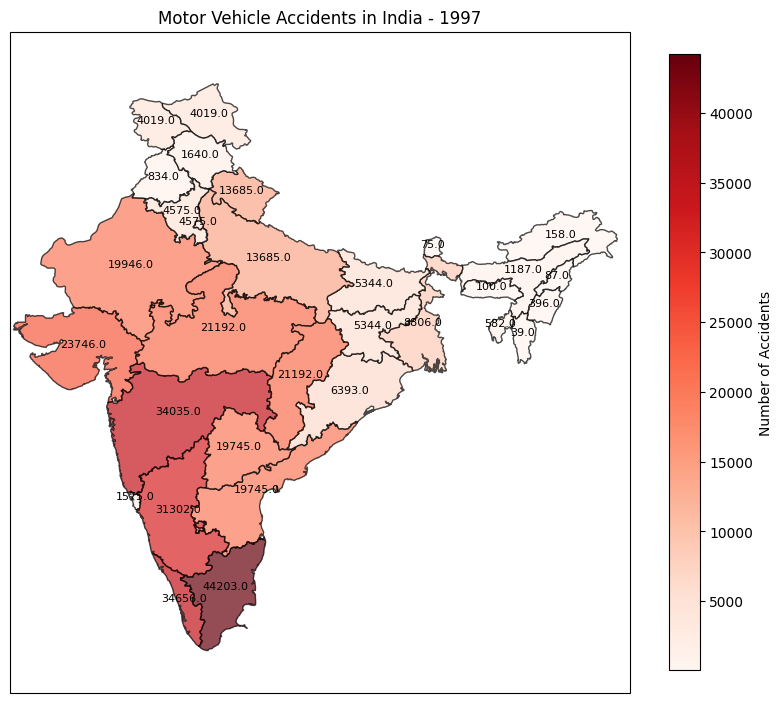

In [87]:
file_path = 'Motor_Transport_Statistics_1997-98_Table_3.1.csv'
data = pd.read_csv(file_path)

year = '1997'

data = data[data['STATE/Uts'] == 'STATE']
data = data[['Note of States /Uts', year]]
data.columns = ['State', 'Accidents']

name_mapping = {
    'Andhra Pradesh': 'Andhra Pradesh',
    'Arunachal Pradesh': 'Arunachal Pradesh',
    'Assam': 'Assam',
    'Bihar': 'Bihar',
    'Goa': 'Goa',
    'Gujarat': 'Gujarat',
    'Haryana': 'Haryana',
    'Himachal Pradesh': 'Himachal Pradesh',
    'Jammu & Kashmir': 'Jammu and Kashmir',
    'Karnataka': 'Karnataka',
    'Kerala ': 'Kerala',
    'Madhya Pradesh': 'Madhya Pradesh',
    'Maharashtra': 'Maharashtra',
    'Manipur ': 'Manipur',
    'Meghalaya': 'Meghalaya',
    'Mizoram ': 'Mizoram',
    'Nagaland': 'Nagaland',
    'Orissa': 'Odisha',
    'Punjab': 'Punjab',
    'Rajasthan': 'Rajasthan',
    'Sikkim': 'Sikkim',
    'Tamil Nadu': 'Tamil Nadu',
    'Tripura': 'Tripura',
    'Uttar Pradesh ': 'Uttar Pradesh',
    'West Bengal': 'West Bengal',
    'A & N Islands': 'Andaman and Nicobar',
    'Chandigarh': 'Chandigarh',
    'D & N Haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'Lakshadweep': 'Lakshadweep',
    'Pondicherry': 'Puducherry'
}

data['State'] = data['State'].replace(name_mapping)

additional_states = {
    'Ladakh': data[data['State'] == 'Jammu and Kashmir']['Accidents'].values[0],
    'Jharkhand': data[data['State'] == 'Bihar']['Accidents'].values[0],
    'Chhattisgarh': data[data['State'] == 'Madhya Pradesh']['Accidents'].values[0],
    'Telangana': data[data['State'] == 'Andhra Pradesh']['Accidents'].values[0],
    'Delhi': data[data['State'] == 'Haryana']['Accidents'].values[0],
    'Uttarakhand': data[data['State'] == 'Uttar Pradesh']['Accidents'].values[0]
}

for state, accidents in additional_states.items():
    data = pd.concat([
        data,
        pd.DataFrame({'State': [state], 'Accidents': [accidents]})
    ], ignore_index=True)

data['Accidents'] = pd.to_numeric(data['Accidents'], errors='coerce')

shapefile = shpreader.natural_earth(resolution='10m', category='cultural', name='admin_1_states_provinces')
reader = shpreader.Reader(shapefile)
states = reader.records()

state_accidents = dict(zip(data['State'], data['Accidents']))

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([68, 98, 6, 38], crs=ccrs.PlateCarree())

norm = plt.Normalize(data['Accidents'].min(), data['Accidents'].max())
cmap = plt.cm.Reds

for state in states:
    if state.attributes['admin'] != 'India':
        continue
    if state.attributes['admin'] == 'Pakistan' and state.attributes['name'] == 'Punjab':
        continue
    state_name = state.attributes['name']
    geometry = state.geometry
    if state_name in state_accidents:
        accidents = state_accidents[state_name]
        color = cmap(norm(accidents))
        ax.add_geometries([geometry], ccrs.PlateCarree(), edgecolor='black', facecolor=color, alpha=0.7)
        ax.text(geometry.centroid.x, geometry.centroid.y, accidents, fontsize=8, ha='center')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax, orientation='vertical', label='Number of Accidents', shrink=0.8)

plt.title(f'Motor Vehicle Accidents in India - {year}')
plt.show()

### **Q.2**

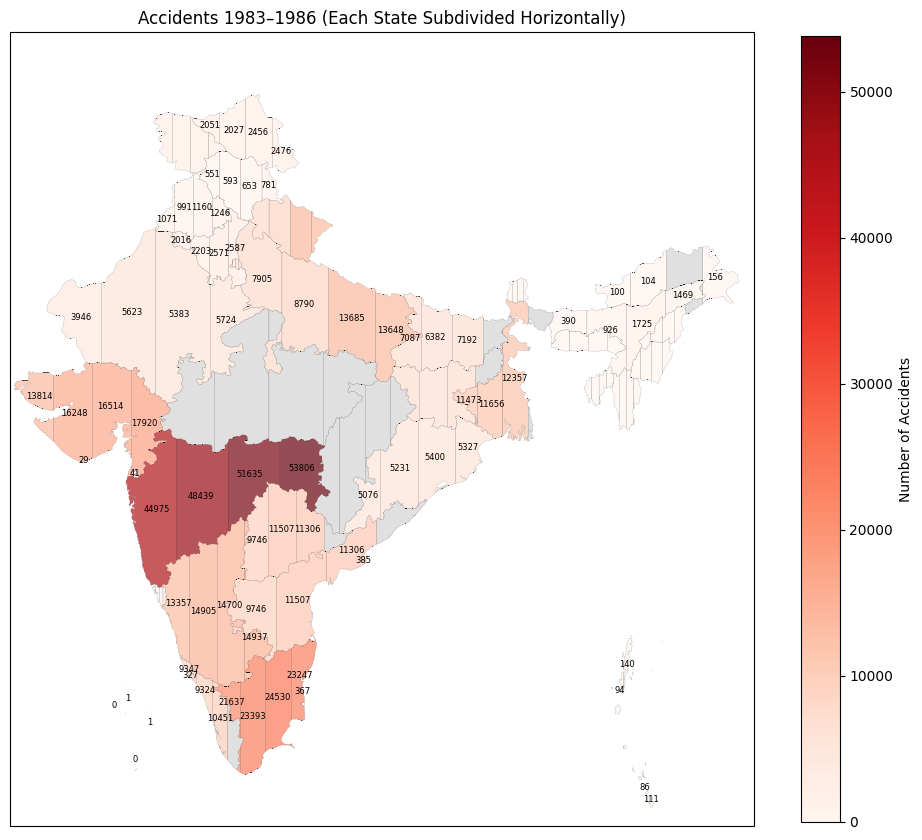

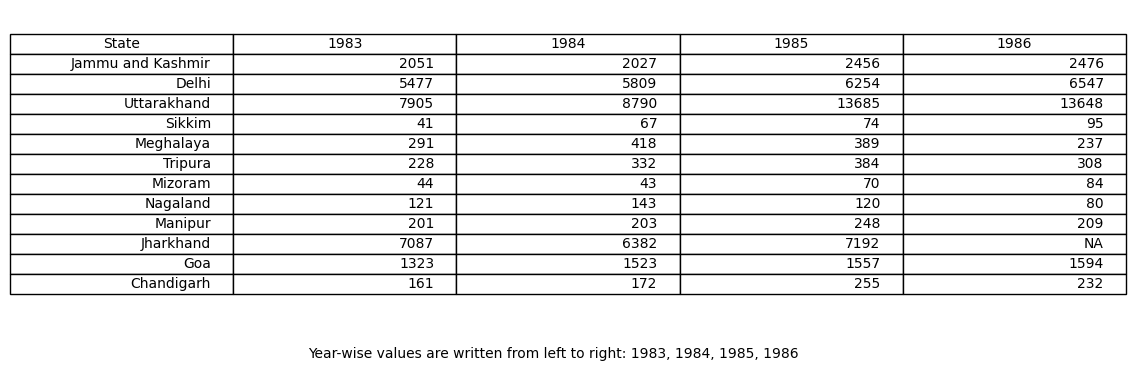

In [108]:
file_path = 'Table_No_3.1_MTSI_1983-86.csv'
df = pd.read_csv(file_path)

df = df[df['Category'].isin(['State', 'Union Territories'])]
df = df.replace('NA', np.nan)

name_mapping = {
    'Andhra Pradesh': 'Andhra Pradesh',
    'Arunachal Pradesh': 'Arunachal Pradesh',
    'Assam': 'Assam',
    'Bihar': 'Bihar',
    'Goa, Daman & Diu': 'Goa',
    'Gujarat': 'Gujarat',
    'Haryana': 'Haryana',
    'Himachal Pradesh': 'Himachal Pradesh',
    'Jammu & Kashmir': 'Jammu and Kashmir',
    'Karnataka': 'Karnataka',
    'Kerala ': 'Kerala',
    'Madya Pradesh': 'Madhya Pradesh',
    'Maharashtra': 'Maharashtra',
    'Manipur ': 'Manipur',
    'Meghalaya': 'Meghalaya',
    'Mizoram ': 'Mizoram',
    'Nagaland': 'Nagaland',
    'Orissa': 'Odisha',
    'Punjab': 'Punjab',
    'Rajasthan': 'Rajasthan',
    'Sikkim': 'Sikkim',
    'Tamil Nadu': 'Tamil Nadu',
    'Tripura': 'Tripura',
    'Uttar Pradesh ': 'Uttar Pradesh',
    'West Bengal': 'West Bengal',
    'A & N Islands': 'Andaman and Nicobar',
    'Chandigarh': 'Chandigarh',
    'Dadra & Nagar Haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'Lakshadweep': 'Lakshadweep',
    'Pondicherry': 'Puducherry'
}
df['States/ Uts'] = df['States/ Uts'].replace(name_mapping)

additional_map = {
    'Ladakh': 'Jammu and Kashmir',
    'Jharkhand': 'Bihar',
    'Chhattisgarh': 'Madhya Pradesh',
    'Telangana': 'Andhra Pradesh',
    'Uttarakhand': 'Uttar Pradesh'
}

for new_state, ref_state in additional_map.items():
    row = {}
    row['Category'] = 'State'
    row['States/ Uts'] = new_state
    for year_col in ['Year - 1983','Year - 1984','Year - 1985','Year - 1986']:
        ref_val = df[df['States/ Uts'] == ref_state][year_col].values
        row[year_col] = ref_val[0] if len(ref_val) > 0 else np.nan
    df = pd.concat([df, pd.DataFrame([row])], ignore_index=True)

shapefile = shpreader.natural_earth(resolution='10m', category='cultural', name='admin_1_states_provinces')
reader = shpreader.Reader(shapefile)
states_geo = list(reader.records())

def get_state_accidents(year_col):
    temp_df = df[['States/ Uts', year_col]].copy()
    temp_df[year_col] = pd.to_numeric(temp_df[year_col], errors='coerce')
    return dict(zip(temp_df['States/ Uts'], temp_df[year_col]))

years = ['Year - 1983','Year - 1984','Year - 1985','Year - 1986']
acc_dict = {y: get_state_accidents(y) for y in years}

all_vals = []
for y in years:
    for val in acc_dict[y].values():
        if not np.isnan(val):
            all_vals.append(val)
acc_min, acc_max = (min(all_vals), max(all_vals)) if all_vals else (0, 1)

shapefile = shpreader.natural_earth(resolution='10m', category='cultural', name='admin_1_states_provinces')
states = list(shpreader.Reader(shapefile).records())

fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([68, 98, 6, 38], crs=ccrs.PlateCarree())
ax.set_title('Accidents 1983–1986 (Each State Subdivided Horizontally)')

cmap = plt.cm.Reds
norm = plt.Normalize(acc_min, acc_max)

table_states = [
    'Jammu and Kashmir', 'Delhi', 'Uttarakhand', 'Sikkim', 'Meghalaya', 
    'Tripura', 'Mizoram', 'Nagaland', 'Manipur', 'Jharkhand', 'Goa', 'Chandigarh'
]

for st in states:
    if st.attributes['admin'] != 'India':
        continue
    if st.attributes['admin'] == 'Pakistan' and st.attributes['name'] == 'Punjab':
        continue

    state_name = st.attributes['name']
    shapely_geom = geom.shape(st.geometry)
    minx, miny, maxx, maxy = shapely_geom.bounds

    total_width = maxx - minx
    for i, y in enumerate(years):
        left = minx + i*(total_width/4.0)
        right = left + (total_width/4.0)
        slice_poly = geom.Polygon([
            (left, miny), (right, miny),
            (right, maxy), (left, maxy)
        ])
        sub_geom = shapely_geom.intersection(slice_poly)
        accidents = acc_dict[y].get(state_name, np.nan)

        if sub_geom.is_empty:
            continue  

        if np.isnan(accidents):
            color = 'lightgray'
        else:
            color = cmap(norm(accidents))

        ax.add_geometries([sub_geom], ccrs.PlateCarree(), facecolor=color, edgecolor='black', alpha=0.7, linewidth=0.1)

        if not np.isnan(accidents) and state_name not in table_states:
            centroid = sub_geom.centroid
            ax.text(centroid.x, centroid.y, str(int(accidents)), fontsize=6, ha='center', va='center', transform=ccrs.PlateCarree())

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.85)
cbar.set_label('Number of Accidents')

table_data = []
for state in table_states:
    row = [state]
    for y in years:
        accidents = acc_dict[y].get(state, np.nan)
        row.append(str(int(accidents)) if not np.isnan(accidents) else 'NA')
    table_data.append(row)

table_fig, table_ax = plt.subplots(figsize=(12, 4))
table_ax.axis('off')
table = table_ax.table(cellText=table_data, colLabels=['State'] + [y.replace('Year - ', '') for y in years], loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

plt.figtext(0.5, 0.01, 'Year-wise values are written from left to right: 1983, 1984, 1985, 1986', ha='center', fontsize=10)
plt.show()

### **Q.3**

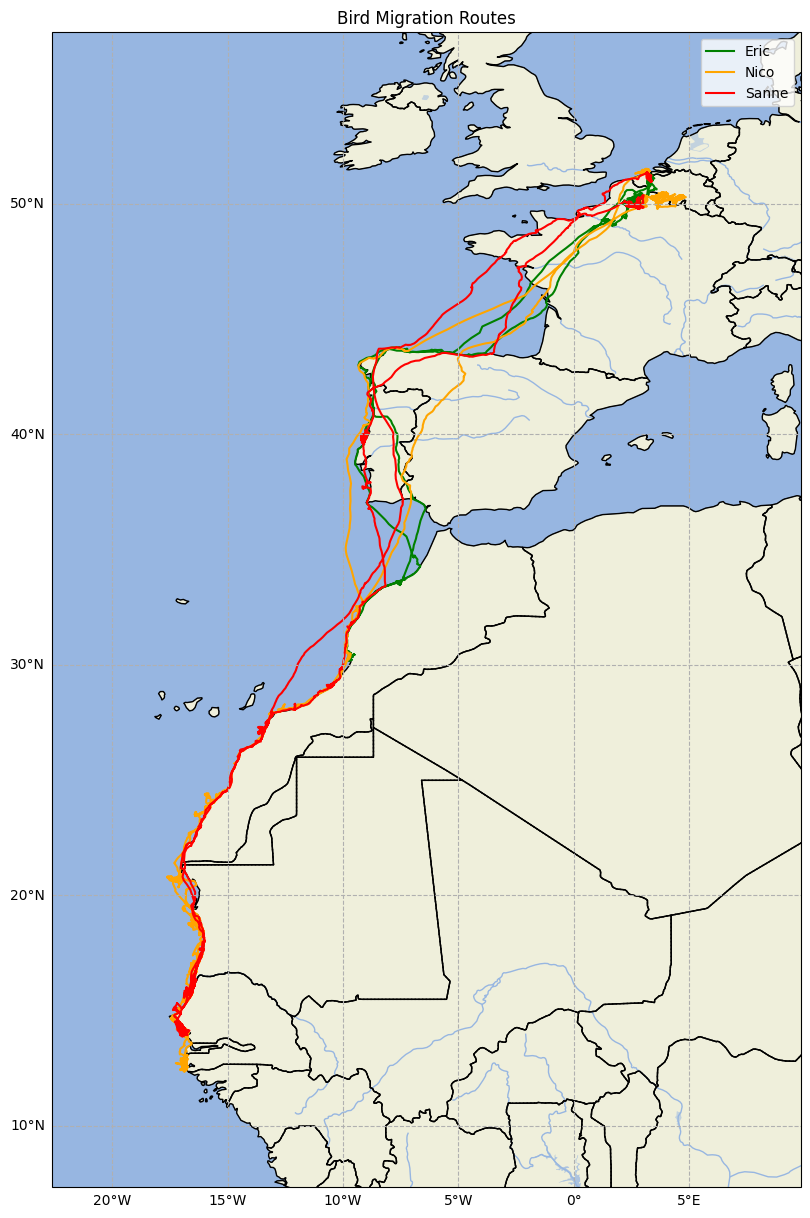

In [132]:
data = pd.read_csv('bird_migration.csv')

fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE, linewidth=0.5, alpha=0.5)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

countries = cfeature.NaturalEarthFeature(category='cultural', name='admin_0_countries', scale='50m', facecolor='none')
ax.add_feature(countries, edgecolor='black')

grouped = data.groupby('bird_name')

colors = ['green', 'orange', 'red']

for name, group in grouped:
    ax.plot(group['longitude'], group['latitude'], marker=None, linestyle='-', label=name, color=colors.pop(0))

plt.legend()

min_lon, max_lon = data['longitude'].min() - 5, data['longitude'].max() + 5
min_lat, max_lat = data['latitude'].min() - 5, data['latitude'].max() + 5
ax.set_extent([min_lon, max_lon, min_lat, max_lat])

gl = ax.gridlines(draw_labels=True, linestyle='--')
gl.top_labels = False
gl.right_labels = False

plt.title('Bird Migration Routes')

plt.show()